# Imports

In [1]:

import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns

sc.settings.verbosity = 4
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()
sc.set_figure_params(frameon=False, color_map='magma_r')

/home/olga/miniconda3/envs/tabula-microcebus-v3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


scanpy==1.5.1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.2 pandas==1.0.5 scikit-learn==0.22 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


In [2]:
h5ad = '/home/olga/googledrive/.shared/Data_Analysis/Combined_Dataset/compartments_with_splicing/rijk_JO_sym-Combined-all.h5ad'
adata = sc.read(h5ad)
adata

AnnData object with n_obs × n_vars = 114491 × 59398
    obs: '10X_barcode', '10X_replicate', '10X_run', '10X_sample', 'anatomical_position', 'barcode', 'batch', 'cell', 'cell_id', 'channel', 'compartment', 'compartment_pred', 'donor', 'donor_tech', 'donor_tech_tissue', 'manual_cell_ontology_class', 'method', 'n_counts', 'n_genes', 'notes', 'propagated_cell_ontology_class', 'sequencer', 'sex', 'smartseq2_barcode', 'smartseq2_cDNA_Plate', 'smartseq2_library_plate', 'smartseq2_sort_order', 'smartseq2_sorted_population', 'smartseq2_sorting_direction', 'smartseq2_well_seq', 'tissue'
    var: 'feature_types-0-0', 'n_cells-0-0', 'gene_symbol-0-0', 'n_cells-1-0', 'n_cells-0', 'feature_types-0-0-1', 'gene_symbol-0-0-1', 'n_cells-1-0-1', 'n_cells-1-1', 'n_cells', 'ensemble_id'
    obsm: 'UMAP_donor_tech.100', 'UMAP_donor_tech.200', 'UMAP_donor_tech.50', 'X_scvi', 'X_scvi_donor_tech', 'X_umap'

In [3]:
adata.var.head()

feature_types-0-0  n_cells-0-0 gene_symbol-0-0  n_cells-1-0  \
DDX11L1       Gene Expression            0         DDX11L1            2   
WASH7P        Gene Expression            1          WASH7P          529   
MIR6859-1     Gene Expression            0       MIR6859-1            7   
MIR1302-2HG   Gene Expression            0     MIR1302-2HG            4   
MIR1302-2     Gene Expression            0       MIR1302-2            0   

             n_cells-0 feature_types-0-0-1 gene_symbol-0-0-1  n_cells-1-0-1  \
DDX11L1              2     Gene Expression           DDX11L1             21   
WASH7P             529     Gene Expression            WASH7P            598   
MIR6859-1            7     Gene Expression         MIR6859-1              6   
MIR1302-2HG          4     Gene Expression       MIR1302-2HG              7   
MIR1302-2            0     Gene Expression         MIR1302-2              0   

             n_cells-1-1  n_cells        ensemble_id  
DDX11L1               25       50  ENSG00000223972.5  
WASH7P               795     1946  ENSG00000227232.5  
MIR6859-1              8       21  ENSG00000278267.1  
MIR1302-2HG            7       19  ENSG00000243485.5  
MIR1302-2              0        0  ENSG00000284332.1

In [4]:
adata.var.tail()

feature_types-0-0  n_cells-0-0 gene_symbol-0-0  n_cells-1-0  \
YBX1_splicing     Gene Expression        37746            YBX1         2462   
YBX3_splicing     Gene Expression        33450            YBX3         2121   
YWHAB_splicing    Gene Expression        33334           YWHAB         2377   
ZFAS1_splicing    Gene Expression        31959           ZFAS1         1546   
ZNHIT1_splicing   Gene Expression        24158          ZNHIT1         1017   

                 n_cells-0 feature_types-0-0-1 gene_symbol-0-0-1  \
YBX1_splicing        40206     Gene Expression              YBX1   
YBX3_splicing        35567     Gene Expression              YBX3   
YWHAB_splicing       35706     Gene Expression             YWHAB   
ZFAS1_splicing       33505     Gene Expression             ZFAS1   
ZNHIT1_splicing      25175     Gene Expression            ZNHIT1   

                 n_cells-1-0-1  n_cells-1-1  n_cells         ensemble_id  
YBX1_splicing             2416         2445   166933  ENSG00000065978.19  
YBX3_splicing             1699         1487   124720  ENSG00000060138.13  
YWHAB_splicing            2539         2745   151740  ENSG00000166913.13  
ZFAS1_splicing            1890         1984   143904  ENSG00000177410.12  
ZNHIT1_splicing           1081         1172    98851  ENSG00000106400.12

In [5]:
adata_splicing_only = adata[:, adata.var.index.str.endswith('_splicing')]

In [6]:
adata.X

<114491x59398 sparse matrix of type '<class 'numpy.float32'>'
	with 379126301 stored elements in Compressed Sparse Row format>

In [7]:
adata[:5, :10].X.todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
adata_splicing_only.X.todense()

matrix([[-0.0494057 ,         nan,         nan, ...,         nan,
          1.3471811 ,         nan],
        [-0.06987022,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]], dtype=float32)

## Replace NAs with 0

In [9]:
new_x = adata_splicing_only.X.todense()
new_x = np.nan_to_num(new_x, 0)
new_x

matrix([[-0.0494057 ,  0.        ,  0.        , ...,  0.        ,
          1.3471811 ,  0.        ],
        [-0.06987022,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]], dtype=float32)

In [10]:
adata_splicing_only.X = new_x

In [18]:
sc.pp.pca(adata_splicing_only, zero_center=False, use_highly_variable=False, svd_solver='arpack', 
          n_comps=200)

computing PCA
    with n_comps=200
        without zero-centering: 
    the explained variance does not correspond to the exact statistical defintion
    the first component, e.g., might be heavily influenced by different means
    the following components often resemble the exact PCA very closely
    finished (0:01:42)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)


computing neighbors
        initialized `.distances` `.connectivities` 
    computing neighbors
    using 'X_pca' with n_pcs = 200


/home/olga/miniconda3/envs/tabula-microcebus-v3/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tabula-microcebus-v3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    computed neighbors (0:00:46)
    computed connectivities (0:00:04)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:50)
computing UMAP
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:10)
the obs value 'propagated_cell_ontology_class' has more than 103 categories. Uniform 'grey' color will be used for all categories.


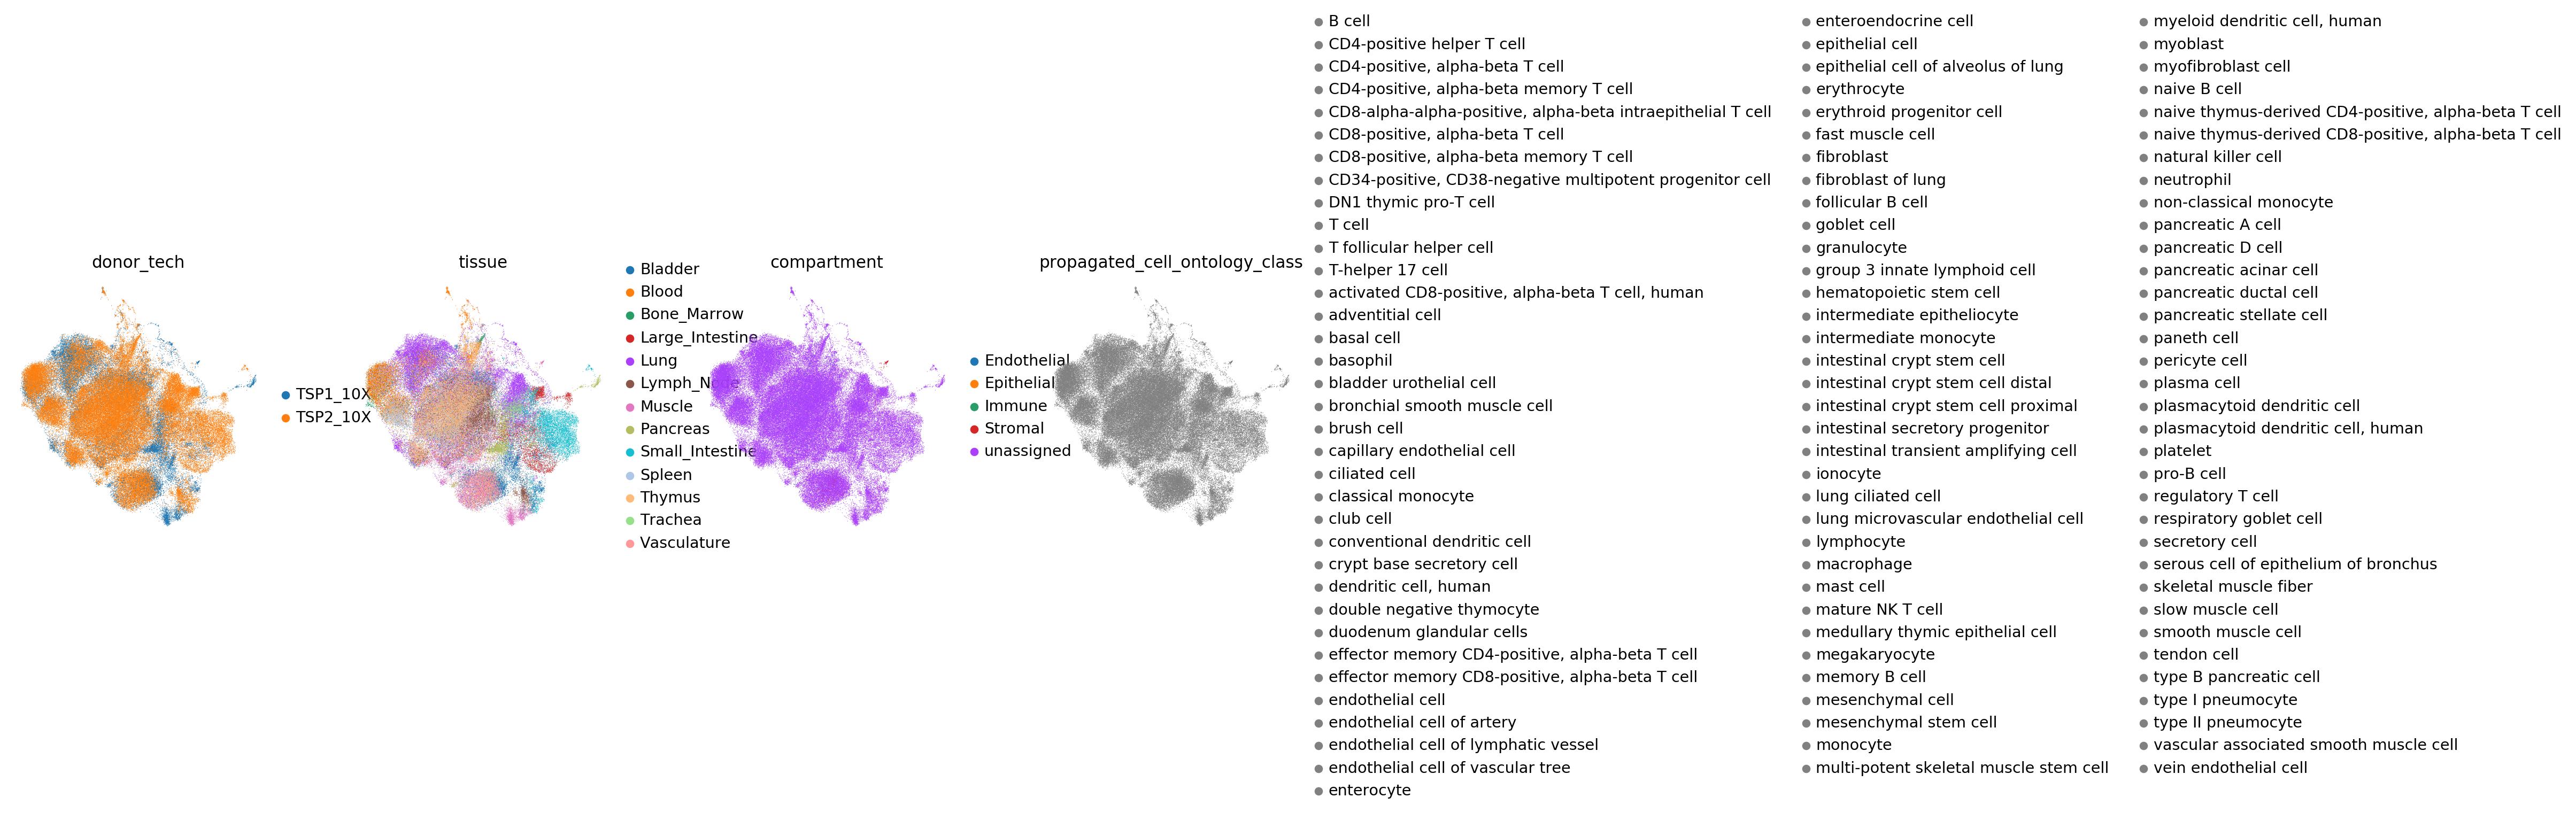

In [19]:
sc.pp.neighbors(adata_splicing_only)
sc.tl.umap(adata_splicing_only)
sc.pl.umap(adata_splicing_only, 
           color=['donor_tech', 'tissue','compartment_pred'])

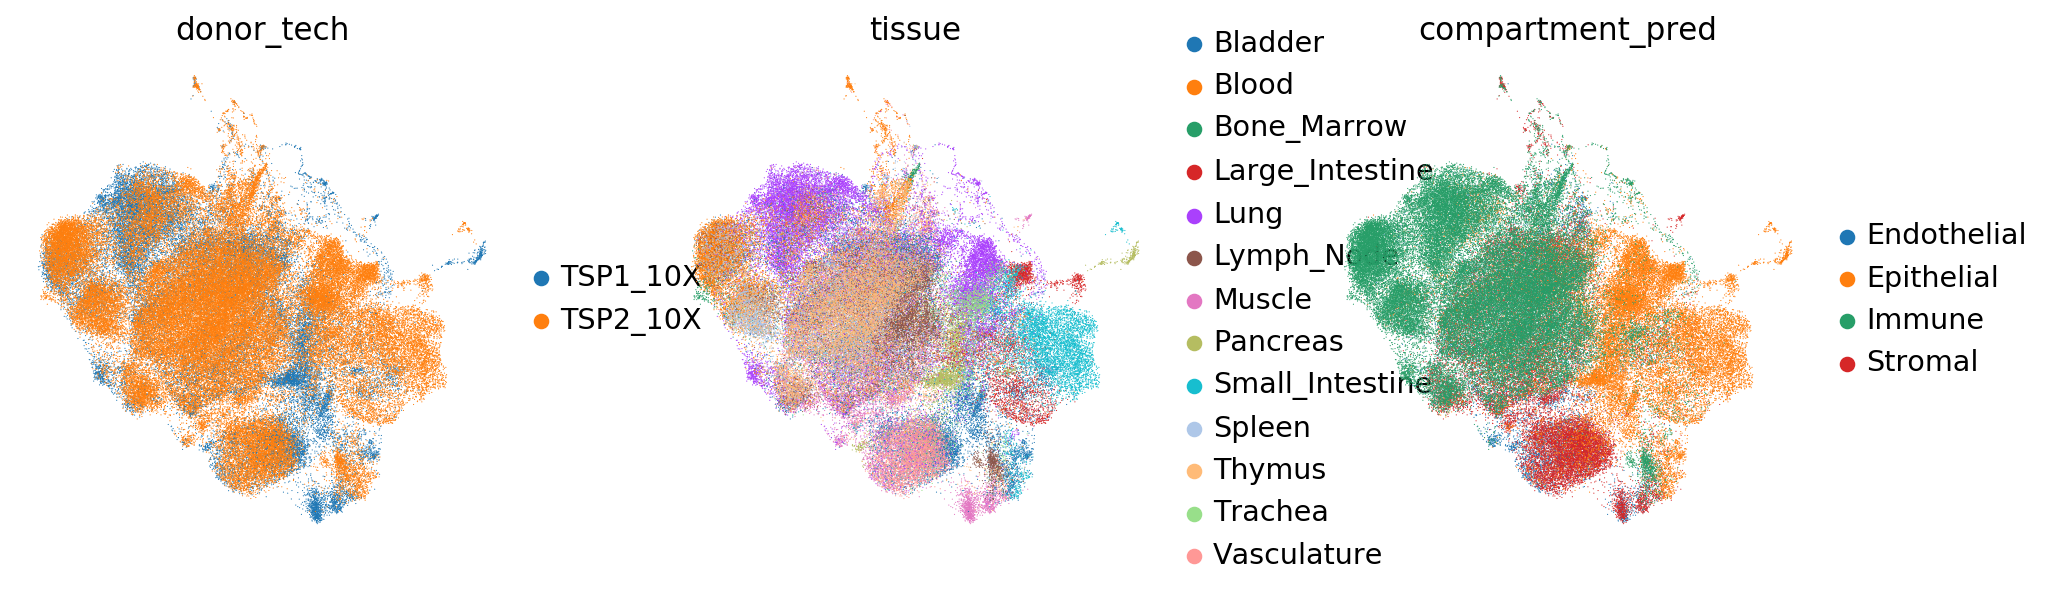

In [20]:
sc.pl.umap(adata_splicing_only, 
           color=['donor_tech', 'tissue', 'compartment_pred'])

computing PCA
    with n_comps=50
        without zero-centering: 
    the explained variance does not correspond to the exact statistical defintion
    the first component, e.g., might be heavily influenced by different means
    the following components often resemble the exact PCA very closely
    finished (0:00:04)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)
computing neighbors
        initialized `.distances` `.connectivities` 
    computing neighbors
    using 'X_pca' with n_pcs = 50


/home/olga/miniconda3/envs/tabula-microcebus-v3/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tabula-microcebus-v3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    computed neighbors (0:00:03)
    computed connectivities (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


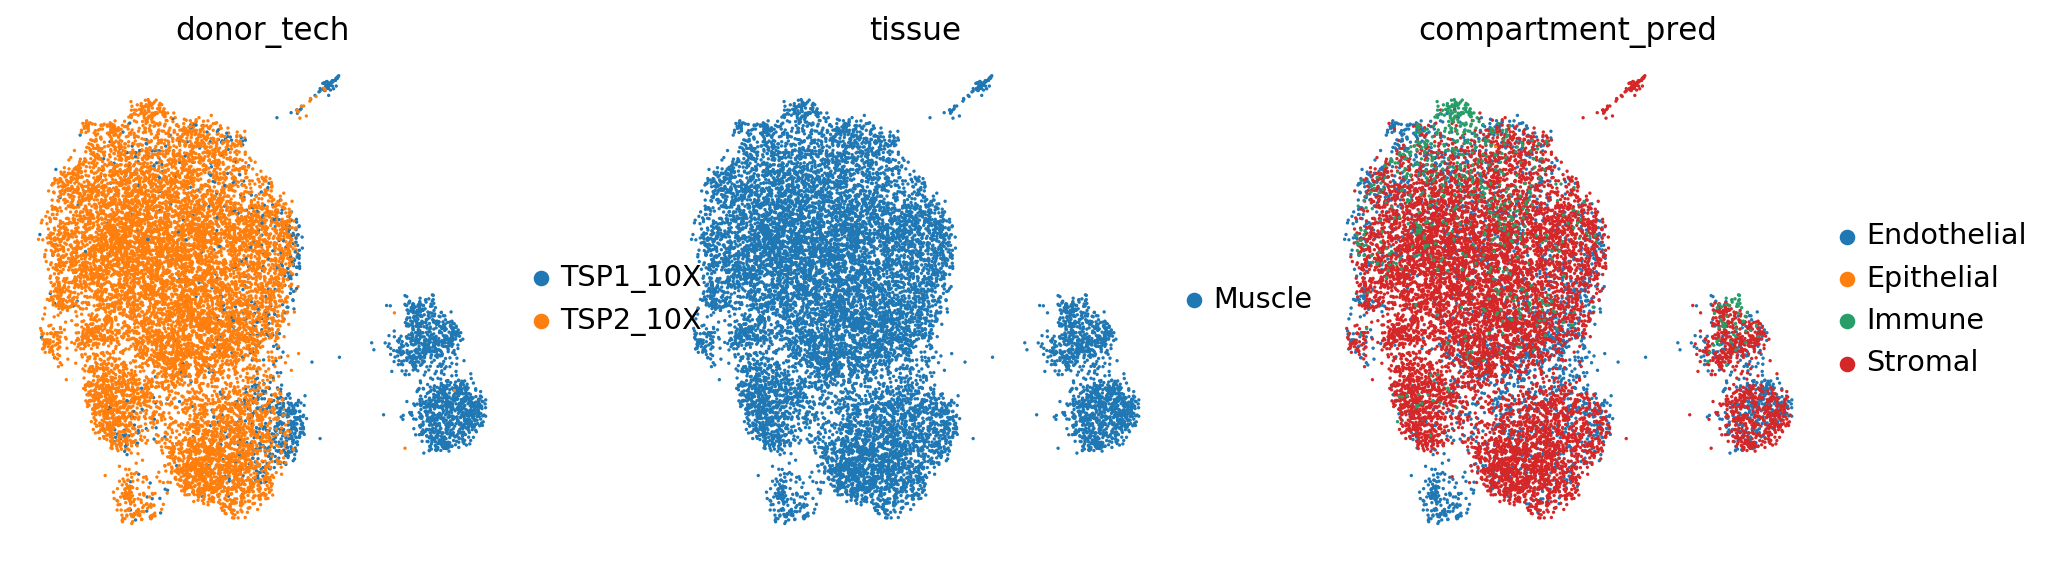

In [17]:
muscle = adata_splicing_only[adata_splicing_only.obs.tissue == "Muscle", :]
sc.pp.pca(muscle, zero_center=False, use_highly_variable=False, svd_solver='arpack')
sc.pp.neighbors(muscle)
sc.tl.umap(muscle)
sc.pl.umap(muscle, 
           color=['donor_tech', 'tissue', 'compartment_pred'])

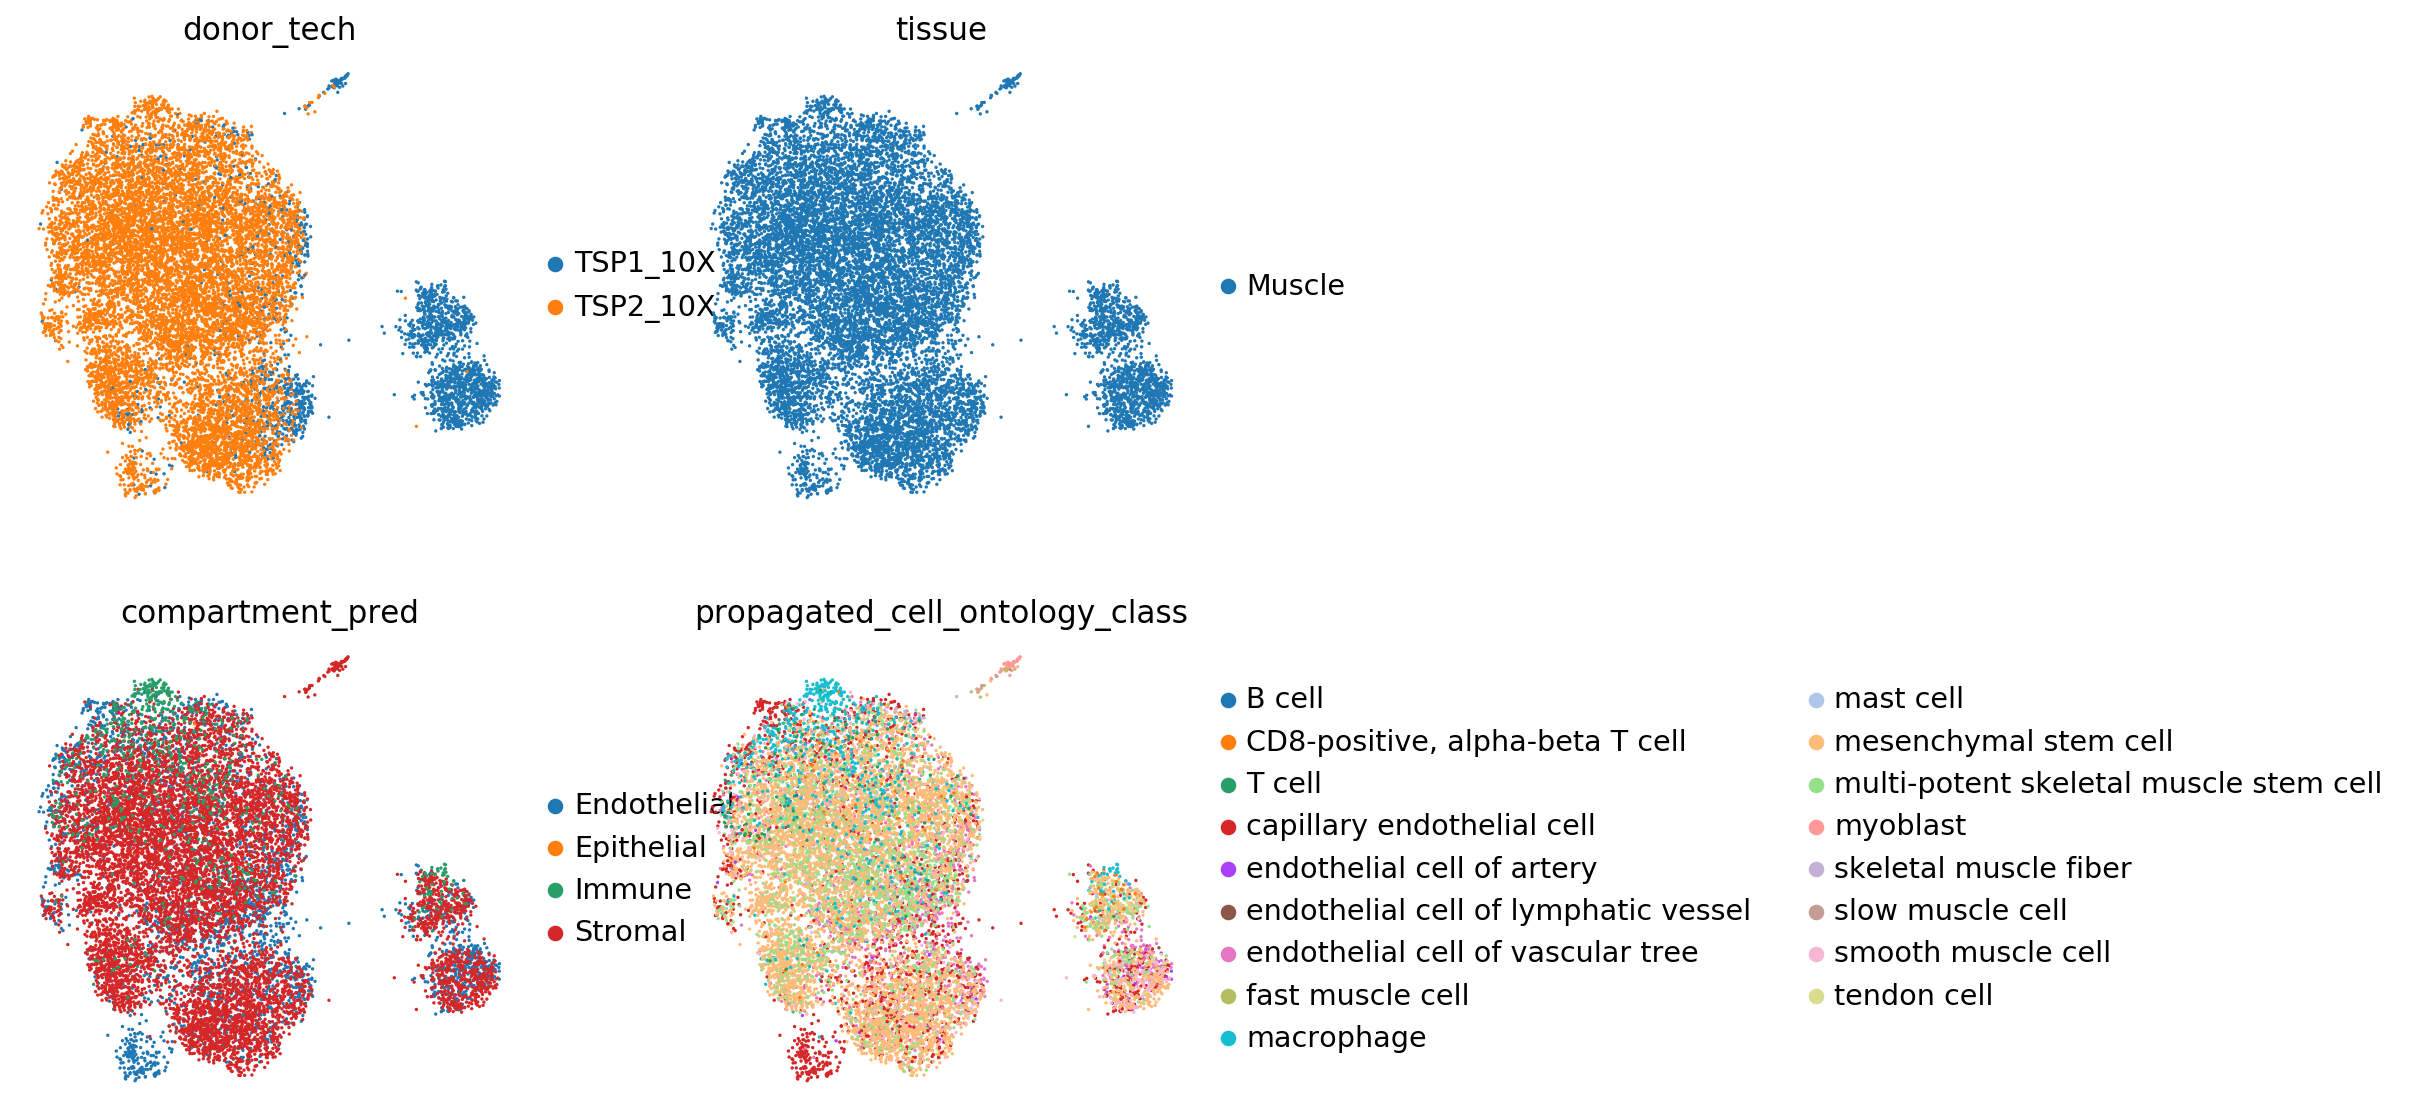

In [21]:
sc.pl.umap(muscle, 
           color=['donor_tech, 'compartment_pred',
                  'propagated_cell_ontology_class'], ncols=2)